# ii Observed deaths by subgroup
The benefit of using a GREASYPOP population vs a Covasim default population is that you can track outcomes for demographic subgroups both spatially and temporaly. But before we look at simulated outcomes by subgroup, let's look at observed outcomes by subgroup so we have something to compare to. This script uses data from [Maryland OpenData](https://opendata.maryland.gov/browse?q=MD%20COVID-19%20-%20MASTER%20Case%20Tracker&sortBy=relevance) on deaths by gender, age, and race. You will want to find data by subgroup for your specific location.

**Input files**
- `MD_COVID-19_-_MASTER_Case_Tracker_20240731.csv`
- `Total_Population_Projections_by_Age__Sex_and_Race_20240801.csv`

**Output files**
- `observed_by_subgroup.csv`


In [1]:
# Import packages and set path
import pandas as pd
import matplotlib.pyplot as plt

path  = ""

## ii.1 Deaths by subgroup

In [2]:
master = pd.read_csv(f'{path}/MD_COVID-19_-_MASTER_Case_Tracker_20240731.csv') # Read in data
master # Preview data

,Filter,ReportDate,TotalCases,CaseDelta,TotalTests,TestsDelta,PosTestPercent,PosPercentDiff,NegativeTests,NegDelta,...,pDeathAfrAmer,pDeathWhite,pDeathHispanic,pDeathAsian,pDeathOther,pDeathNotAvail,adultacutehospitalizations,adulticuhospitalizations,pedacutehospitalizations,pedicuhospitalizations
0,NaN,03/04/2020 10:00:00 AM,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,NaN,03/05/2020 10:00:00 AM,3,3,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,NaN,03/06/2020 10:00:00 AM,3,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,NaN,03/07/2020 10:00:00 AM,3,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,NaN,03/08/2020 10:00:00 AM,5,2,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,NaN,07/26/2024 10:00:00 AM,1464581,395,NaN,NaN,NaN,NaN,NaN,0,...,105.0,142.0,20.0,12.0,2.0,0,132,13,5,3
1606,NaN,07/27/2024 10:00:00 AM,1464972,391,NaN,NaN,NaN,NaN,NaN,0,...,105.0,142.0,20.0,12.0,2.0,0,135,12,3,3
1607,NaN,07/28/2024 10:00:00 AM,1465168,196,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,155,14,3,3
1608,NaN,07/29/2024 10:00:00 AM,1465301,133,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,148,16,3,3


In [3]:
master['date'] = (master['ReportDate'].astype(str).str[6:10] +'-'+ # Reformat Date
                  master['ReportDate'].astype(str).str[0:2] +'-'+ 
                  master['ReportDate'].astype(str).str[3:5])
master = master[:119] # Filter for the date range of your simulation

Now select the columns of interest. For this example, we will look at deaths by age, gender, and race. OpenData tracks confirmed deaths and probable deaths, so we will add these together to get total deaths.

In [4]:
master_dem = master[['date',
                            # Confirmed deaths by age group
                            'death0to9',	'death10to19',	'death20to29',	'death30to39',	'death40to49',	    # death = confirmed
                            'death50to59',	'death60to69',	'death70to79',	'death80plus',	'deathAgeUnknown',	
                            # Confirmed deaths by gender
                            'deathGenMale','deathGenFemale','deathGenUnkn',	
                            # Confirmed deaths by race
                            'deathAfrAmer','deathWhite','deathHispanic',
                            'deathAsian','deathOther','deathNotAvail',
                            # Probable deaths by age group
                            'pDeath0to9',	'pDeath10to19',	'pDeath20to29',	'pDeath30to39',	'pDeath40to49',	    # pDeath = probable
                            'pDeath50to59',	'pDeath60to69',	'pDeath70to79',	'pDeath80plus',	'pDeathAgeUnknown',	
                            # Probable deaths by gender
                            'pDeathGenMale','pDeathGenFemale','pDeathGenUnkn',	
                            # Probable deaths by race
                            'pDeathAfrAmer','pDeathWhite','pDeathHispanic',
                            'pDeathAsian','pDeathOther','pDeathNotAvail']]

vars = ['0to9','10to19','20to29','30to39','40to49','50to59','60to69','70to79','80plus','AgeUnknown', # Create a list of variables to loop through
        'GenMale','GenFemale','GenUnkn',
        'AfrAmer','White','Hispanic','Asian','Other','NotAvail']

In [5]:
for var in vars: # Loop through variables and add confirmed and probable deaths
    master_dem['D_obs_'+var] = master_dem['death'+var] + master_dem['pDeath'+var]

/var/folders/9f/7594l8nn5czfjw4cd7xxcw640000gq/T/ipykernel_99203/1028756088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dem['D_obs_'+var] = master_dem['death'+var] + master_dem['pDeath'+var]
/var/folders/9f/7594l8nn5czfjw4cd7xxcw640000gq/T/ipykernel_99203/1028756088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dem['D_obs_'+var] = master_dem['death'+var] + master_dem['pDeath'+var]
/var/folders/9f/7594l8nn5czfjw4cd7xxcw640000gq/T/ipykernel_99203/1028756088.py:2: SettingWithCopyWar

In [6]:
master_dem = master_dem[['date','D_obs_0to9','D_obs_10to19', # Keep columns of interest
                         'D_obs_20to29','D_obs_30to39',
                         'D_obs_40to49','D_obs_50to59',
                         'D_obs_60to69','D_obs_70to79',
                         'D_obs_80plus','D_obs_AgeUnknown',
                         'D_obs_GenMale','D_obs_GenFemale','D_obs_GenUnkn',
                         'D_obs_AfrAmer','D_obs_White','D_obs_Hispanic',
                         'D_obs_Asian','D_obs_Other','D_obs_NotAvail']]

In [7]:
master_dem = master_dem.rename(columns={'D_obs_NotAvail':'D_obs_RaceNotAvail'}) # Rename so more specific
master_dem.head() # Preview data

,date,D_obs_0to9,D_obs_10to19,D_obs_20to29,D_obs_30to39,D_obs_40to49,D_obs_50to59,D_obs_60to69,D_obs_70to79,D_obs_80plus,D_obs_AgeUnknown,D_obs_GenMale,D_obs_GenFemale,D_obs_GenUnkn,D_obs_AfrAmer,D_obs_White,D_obs_Hispanic,D_obs_Asian,D_obs_Other,D_obs_RaceNotAvail
0,2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
1,2020-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
2,2020-03-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
3,2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
4,2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0


## ii.2. Population by subgroup
OpenData also provides [population numbers](https://opendata.maryland.gov/Demographic/Total-Population-Projections-by-Age-Sex-and-Race/5zc8-s5s9/data_preview) by subgroup which we will use to calculate per 100k rates.

In [8]:
pop = pd.read_csv(f'{path}/Total_Population_Projections_by_Age__Sex_and_Race_20240801.csv') # Read in data
pop = pop.loc[(pop['Year'] == 2020) & (pop['Jurisdiction'] == 'State of Maryland')] # Filter by year and state
pop # Preview data

,Jurisdiction,Year,Category,0-4,5-9,10-14,15-19,20-24,25-29,30-34,...,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85+,Total
56,State of Maryland,2020,Total Male,186530,184615,195215,201389,191354,211227,212244,...,181345,195313,209927,189168,147709,114033,73726,43773,41894,2966646
704,State of Maryland,2020,Total Non_Hispanic Other,40732,41443,51122,51981,43101,40739,40625,...,41871,37658,34914,30074,22741,17487,11265,7005,5927,603673
723,State of Maryland,2020,Total Hispanic,56349,56990,54734,51724,44602,47825,54368,...,44097,35698,28457,20352,12984,7923,4851,2828,2051,637067
760,State of Maryland,2020,Hispanic Male,29001,29245,27826,26352,23338,25755,29451,...,23814,18896,14383,10075,6127,3314,1963,992,742,331903
887,State of Maryland,2020,Non-Hisp White Male,77098,74405,78089,84629,86631,100562,102954,...,84831,102509,121496,116208,96269,77719,51841,30837,31263,1494564
1000,State of Maryland,2020,Non-Hisp Other Female,20097,20580,25165,26181,22119,21161,21508,...,23026,20484,18906,16308,12609,9863,6431,3899,3060,318512
1139,State of Maryland,2020,Hispanic Female,27348,27745,26908,25372,21264,22070,24917,...,20283,16802,14074,10277,6857,4609,2888,1836,1309,305164
1234,State of Maryland,2020,Non-Hisp Other Male,20635,20863,25957,25800,20982,19578,19117,...,18845,17174,16008,13766,10132,7624,4834,3106,2867,285161
1389,State of Maryland,2020,Total Non-Hispanic Black,117476,117799,125207,126803,121840,136680,132824,...,117530,126046,130122,112589,86545,63895,39519,24121,25129,1845762
1424,State of Maryland,2020,Non-Hisp White Female,73751,71264,73559,80569,82233,96630,99699,...,88880,108002,126646,122397,105919,89139,64359,41938,59117,1560742


First, let's  look at the populations by gender and race.

In [9]:
pop_dem = pop[['Category','Total']] # Keep columns of interest
pop_dem = pop_dem.rename(columns={'Category':'variable','Total':'obs_pop'}) # Rename columns
pop_dem.loc[pop_dem['variable'] == 'Total Male', 'variable'] = 'sex_male' # Rename categories to match GREASYPOP categories in 
                                                                          # new column 'variable'
pop_dem.loc[pop_dem['variable'] == 'Total Female', 'variable'] = 'sex_female'
pop_dem.loc[pop_dem['variable'] == 'Total Non-Hispanic Black', 'variable'] = 'race_black_alone'
pop_dem.loc[pop_dem['variable'] == 'Total Non-Hispanic White', 'variable'] = 'race_white_non_hispanic'
pop_dem.loc[pop_dem['variable'] == 'Total Hispanic', 'variable'] = 'race_hispanic'
pop_dem.loc[pop_dem['variable'] == 'Total Non_Hispanic Other', 'variable'] = 'race_non_hispanic_other'
pop_dem = pop_dem.loc[pop_dem['variable'].isin(['sex_male','sex_female','race_black_alone', # Keep relevant columns
                                                'race_white_non_hispanic','race_hispanic',
                                                'race_non_hispanic_other','Total'])]
pop_dem = pop_dem.T # Transpose
header = pop_dem.iloc[0] # Store first row values
pop_dem = pop_dem[1:] # Take the data minus the first row
pop_dem.columns = header # Make that first row the column names
pop_dem # Preview data

variable,sex_male,race_non_hispanic_other,race_hispanic,race_black_alone,sex_female,Total,race_white_non_hispanic
obs_pop,2966646,603673,637067,1845762,3175162,6141808,3055306


Now we'll generate the population numbers by 10-year age groups.

In [10]:
pop_age = pop.drop(columns=['Year','Jurisdiction']) # Drop irrelevant columns
pop_age = pop_age.loc[(pop_age['Category'] == 'Total')] # Keep totals
pop_age.drop(columns=['Category'], inplace=True) # Drop column
pop_age = pop_age.T.reset_index() # Transpose and reset index
pop_age.rename(columns={1873:'obs_pop'}, inplace=True) # Rename
pop_age.loc[pop_age['index'] == '0-4', 'variable'] = 'age_0to9'  # Assign age groups in the 'variable' column
pop_age.loc[pop_age['index'] == '5-9', 'variable'] = 'age_0to9'
pop_age.loc[pop_age['index'] == '10-14', 'variable'] = 'age_10to19'
pop_age.loc[pop_age['index'] == '15-19', 'variable'] = 'age_10to19'
pop_age.loc[pop_age['index'] == '20-24', 'variable'] = 'age_20to29'
pop_age.loc[pop_age['index'] == '25-29', 'variable'] = 'age_20to29'
pop_age.loc[pop_age['index'] == '30-34', 'variable'] = 'age_30to39'
pop_age.loc[pop_age['index'] == '35-39', 'variable'] = 'age_30to39'
pop_age.loc[pop_age['index'] == '40-44', 'variable'] = 'age_40to49'
pop_age.loc[pop_age['index'] == '45-49', 'variable'] = 'age_40to49'
pop_age.loc[pop_age['index'] == '50-54', 'variable'] = 'age_50to59'
pop_age.loc[pop_age['index'] == '55-59', 'variable'] = 'age_50to59'
pop_age.loc[pop_age['index'] == '60-64', 'variable'] = 'age_60to69'
pop_age.loc[pop_age['index'] == '65-69', 'variable'] = 'age_60to69'
pop_age.loc[pop_age['index'] == '70-74', 'variable'] = 'age_70to79'
pop_age.loc[pop_age['index'] == '75-79', 'variable'] = 'age_70to79'
pop_age.loc[pop_age['index'] == '80-84', 'variable'] = 'age_80plus'
pop_age.loc[pop_age['index'] == '85+', 'variable'] = 'age_80plus'
pop_age.loc[pop_age['index'] == 'Total', 'variable'] = 'age_total'
pop_age = pop_age.groupby('variable').agg({'obs_pop':'sum'}).reset_index() # Group data by age groups
pop_age = pop_age.T # Transpose
header = pop_age.iloc[0] # Store the first row
pop_age = pop_age[1:] # Remove the first row
pop_age.columns = header # Make the first row the column names
pop_age # Preview data

variable,age_0to9,age_10to19,age_20to29,age_30to39,age_40to49,age_50to59,age_60to69,age_70to79,age_80plus,age_total
obs_pop,727307,778417,800843,844607,754794,851548,726078,427998,230216,6141808


## ii.3 Calculate deaths per 100k
Finally, generate per 100k values and export.

In [11]:
# Deaths per 100k by age groups
master_dem['D_obs_0to9_per100k'] = master_dem['D_obs_0to9'] / pop_age['age_0to9'].iloc[0] * 100_000
master_dem['D_obs_10to19_per100k'] = master_dem['D_obs_10to19'] / pop_age['age_10to19'].iloc[0] * 100_000
master_dem['D_obs_20to29_per100k'] = master_dem['D_obs_20to29'] / pop_age['age_20to29'].iloc[0] * 100_000
master_dem['D_obs_30to39_per100k'] = master_dem['D_obs_30to39'] / pop_age['age_30to39'].iloc[0] * 100_000
master_dem['D_obs_40to49_per100k'] = master_dem['D_obs_40to49'] / pop_age['age_40to49'].iloc[0] * 100_000
master_dem['D_obs_50to59_per100k'] = master_dem['D_obs_50to59'] / pop_age['age_50to59'].iloc[0] * 100_000
master_dem['D_obs_60to69_per100k'] = master_dem['D_obs_60to69'] / pop_age['age_60to69'].iloc[0] * 100_000
master_dem['D_obs_70to79_per100k'] = master_dem['D_obs_70to79'] / pop_age['age_70to79'].iloc[0] * 100_000
master_dem['D_obs_80plus_per100k'] = master_dem['D_obs_80plus'] / pop_age['age_80plus'].iloc[0] * 100_000
# Deaths per 100k by gender
master_dem['D_obs_male_per100k'] = master_dem['D_obs_GenMale'] / pop_dem['sex_male'].iloc[0] * 100_000
master_dem['D_obs_female_per100k'] = master_dem['D_obs_GenFemale'] / pop_dem['sex_female'].iloc[0] * 100_000
# Deaths per 100k by race
master_dem['D_obs_black_per100k'] = master_dem['D_obs_AfrAmer'] / pop_dem['race_black_alone'].iloc[0] * 100_000
master_dem['D_obs_hispanic_per100k'] = master_dem['D_obs_Hispanic'] / pop_dem['race_hispanic'].iloc[0] * 100_000
master_dem['D_obs_white_per100k'] = master_dem['D_obs_White'] / pop_dem['race_white_non_hispanic'].iloc[0] * 100_000
master_dem['day'] = master_dem.index+32 # This will be useful later since our sim simulates 151 days and starts at 2020-02-01
master_dem.to_csv(f'{path}/observed_by_subgroup.csv') # Export
master_dem

,date,D_obs_0to9,D_obs_10to19,D_obs_20to29,D_obs_30to39,D_obs_40to49,D_obs_50to59,D_obs_60to69,D_obs_70to79,D_obs_80plus,...,D_obs_50to59_per100k,D_obs_60to69_per100k,D_obs_70to79_per100k,D_obs_80plus_per100k,D_obs_male_per100k,D_obs_female_per100k,D_obs_black_per100k,D_obs_hispanic_per100k,D_obs_white_per100k,day
0,2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32
1,2020-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33
2,2020-03-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34
3,2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35
4,2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2020-06-26,0.0,1.0,17.0,44.0,98.0,243.0,500.0,753.0,1462.0,...,28.536266,68.863125,175.935402,635.055774,54.034084,48.469968,69.022983,53.212613,43.956317,146
115,2020-06-27,0.0,1.0,17.0,44.0,99.0,248.0,502.0,755.0,1470.0,...,29.123432,69.138577,176.402693,638.530771,54.202625,48.784912,69.293874,53.840491,44.185427,147
116,2020-06-28,0.0,1.0,18.0,44.0,99.0,248.0,502.0,760.0,1472.0,...,29.123432,69.138577,177.570923,639.399520,54.438581,48.910890,69.510587,53.997460,44.218157,148
117,2020-06-29,0.0,1.0,18.0,44.0,99.0,250.0,504.0,761.0,1476.0,...,29.358298,69.414030,177.804569,641.137019,54.573414,49.005374,69.673121,54.311399,44.316347,149


## ii.4 Plotting
Now we can take a look at the epidemic curves by subgroup.

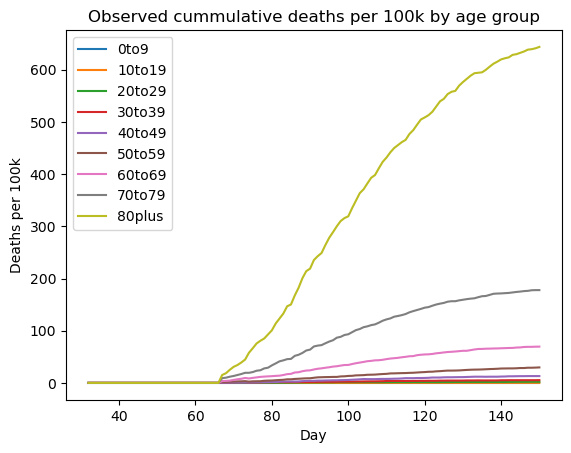

In [12]:
# Cummulative deaths per 100k by age group
plt.title('Observed cummulative deaths per 100k by age group')
plt.xlabel('Day')
plt.ylabel('Deaths per 100k')
plt.plot(master_dem['day'], master_dem['D_obs_0to9_per100k']  , label='0to9')
plt.plot(master_dem['day'], master_dem['D_obs_10to19_per100k'], label='10to19')
plt.plot(master_dem['day'], master_dem['D_obs_20to29_per100k'], label='20to29')
plt.plot(master_dem['day'], master_dem['D_obs_30to39_per100k'], label='30to39')
plt.plot(master_dem['day'], master_dem['D_obs_40to49_per100k'], label='40to49')
plt.plot(master_dem['day'], master_dem['D_obs_50to59_per100k'], label='50to59')
plt.plot(master_dem['day'], master_dem['D_obs_60to69_per100k'], label='60to69')
plt.plot(master_dem['day'], master_dem['D_obs_70to79_per100k'], label='70to79')
plt.plot(master_dem['day'], master_dem['D_obs_80plus_per100k'], label='80plus')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1)) 
plt.show()

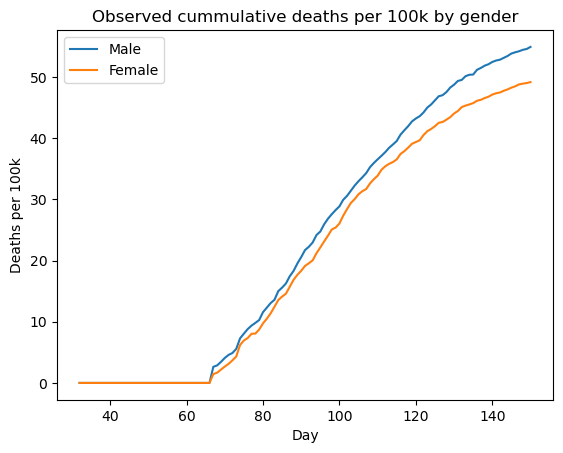

In [13]:
# Cummulative deaths per 100k by gender
plt.title('Observed cummulative deaths per 100k by gender')
plt.xlabel('Day')
plt.ylabel('Deaths per 100k')
plt.plot(master_dem['day'], master_dem['D_obs_male_per100k']  , label='Male')
plt.plot(master_dem['day'], master_dem['D_obs_female_per100k'], label='Female')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1)) 
plt.show()

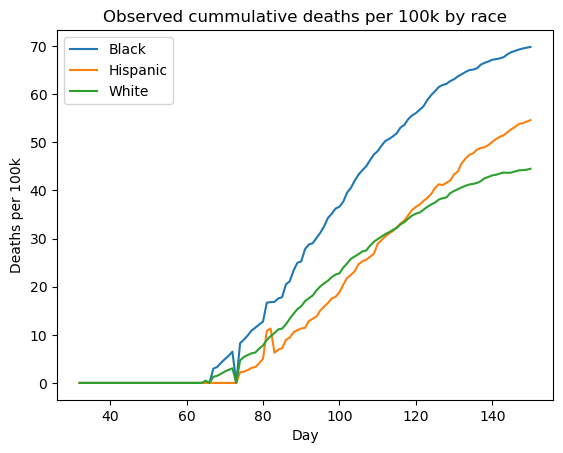

In [14]:
# Cummulative deaths per 100k by race
plt.title('Observed cummulative deaths per 100k by race')
plt.xlabel('Day')
plt.ylabel('Deaths per 100k')
plt.plot(master_dem['day'], master_dem['D_obs_black_per100k']  , label='Black')
plt.plot(master_dem['day'], master_dem['D_obs_hispanic_per100k'], label='Hispanic')
plt.plot(master_dem['day'], master_dem['D_obs_white_per100k'], label='White')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1)) 
plt.show()